# Frequency Domain
SPI2 Basics on Image processing

Ecole Centrale Nantes

Diana Mateus

## 0. Preparation 

### 0.1 Import the required modules


In [350]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import skimage.io as io
from skimage.transform import resize
from PIL import Image as imagesave

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook.

In [351]:
IMDIR = "./images/images"
print(os.listdir(IMDIR))

 

['.DS_Store', 'Fourier', 'Frequency', 'jpeg', 'PhaseMag']


### 0.2 Read and display the images
Check that you can read and display all the provided images. Do not include this cell, the code nor its ouput in the final report

## 1. The Discrete Fourier Transform




In this exercise we will compute and visualize a DFT using numpy's fft functions:
- ```np.fft.fft2```: computes the two-dimensional FFT of an image.
- ```np.fft.fftshift```: center the frecuencies in the middle of the image
- ```np.fft.ifftshift```: reverses the centering
- ```np.fft.ifft2```: inverse fourier transform
- ```np.real```: takes the real components of a complex number
- ```np.abs```: recovers the magnitude of a complex number
- ```np.angle```: recovers the phase of a complex number 
- ```np.log```: computes the logarithm

The following code uses the above functions applied to the provided images, and shows

**a)** the original image 

**b)** the magnitude of its fft (scaled logarithmically)

**c)** the magnitude of its **centered(shifted)** Discrete Fourier transform fft (scaled logarithmically)

**c)** the inverse fft of the above transformed image (all the steps shouls be reversed)

**d) For each image explain how to interpret the FFT images**


# IMAGES IN FOURIER FOLDER

In [352]:
#SUBDIR = IMDIR 


'''for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            im = io.imread(f,as_gray=True)
            #im = resize(im,(100,100),mode='constant') #Uncomment this line if it is too slow
    
            
            # TO EXPLAIN BY STUDENTS
            im_fft = np.fft.fft2(im)
            im_fft_shifted=np.fft.fftshift(im_fft)
            im_fft_shifted=im_fft_shifted[:,:]
            im_recon = np.real(np.fft.ifft2(np.fft.ifftshift(im_fft_shifted)))
            # END TO EXPLAIN BY STUDENTS
            
            
            fig=plt.figure(figsize=(16, 18))

            plt.subplot(141)
            plt.title('Original image')
            plt.imshow(im)
            plt.gray()
            plt.axis('off')

            
            plt.subplot(142)
            plt.title('log FFT ')
            plt.imshow(np.log(np.abs(im_fft)))
            plt.gray()
            plt.axis('off')
                        
            plt.subplot(143)
            plt.title('log shift FFT ')
            plt.imshow(np.log(np.abs(im_fft_shifted)))
            plt.gray()
            plt.axis('off')

            
            plt.subplot(144)
            plt.title('Reconstructed image')
            plt.imshow(im_recon)
            plt.gray()
            plt.axis('off')
            
            plt.show() '''

"for root, dirnames, filenames in os.walk(SUBDIR):\n    # print path to all filenames.\n    for filename in filenames:\n        f = os.path.join(root, filename)\n        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):\n            print(f)\n            im = io.imread(f,as_gray=True)\n            #im = resize(im,(100,100),mode='constant') #Uncomment this line if it is too slow\n    \n            \n            # TO EXPLAIN BY STUDENTS\n            im_fft = np.fft.fft2(im)\n            im_fft_shifted=np.fft.fftshift(im_fft)\n            im_fft_shifted=im_fft_shifted[:,:]\n            im_recon = np.real(np.fft.ifft2(np.fft.ifftshift(im_fft_shifted)))\n            # END TO EXPLAIN BY STUDENTS\n            \n            \n            fig=plt.figure(figsize=(16, 18))\n\n            plt.subplot(141)\n            plt.title('Original image')\n            plt.imshow(im)\n            plt.gray()\n            plt.axis('off')\n\n            \n            plt.subplot(142)\n           

##  2. PROJECT JPEG

**Introduction**

The jpeg compression follows several steps

**i)** Convert images from RGB to YIQ color space

**ii)** Reduce the size (to half) of the I and Q channels

**iii)** An image is first subdivided in 8x8 subblocks (assuming the original image has sides whose length is a multiple of 8, if it is not the case just resize it).

**iv)** A frequency transformation is computed for each block (computed with a discrete cosine transform DCT II )
```
fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')
```
**v)** The DCT results are then divided by the elements of the the quantization matrices given in ```quantization_table```. The resulting values are then rounded and stored as integers. **Hint:** use the functions  ```round()```, ```astype(np.int32)```

**vi)** The result of quantization (which should have many zeros) is then compressed Run Lenght Coding and Huffman coding to reduce the size. The compressed values are saved together with the quantization table.

**vii)** The reconstruction of the image implies inverting the encoding, the quantization and the dct.



**Instructions**

- This project is individual! This means both the code and report should be original and different for each of you. The 0 grade will apply for any attempt to break this rule.

- You are expected to return both the jupyter notebook along with a report explaining the method and the results of the jpeg compression on SEVERAL images.


- You are **ONLY** allowed to use:
    - any ``numpy`` and ``matplotlib`` functions 
    - ``io.imread`` to read the images
    - the provided functions to compute the ``dct``  
    - the provided functions to compute the quantization matrix ```quantization_table```. 
    - other functions from ``skimage`` are not needed!!! I will tolerate them only in the case you completely explain in the report (with descriptions and equations)  what this functions do.


- If you use code from an external source, this source should be cited. Failinig to do so, also leads to a grade of 0.


- The first cell of the notebook must start with the definition of the ```filename``` variable, which especifies the path of the image that will be compressed. To test your code on other images, I will only change this line. The code should run adapting to any input image.


- Implement all the jpeg compression steps (i-v) . Do **NOT** implement step vi) Run Lenght Code and Huffman coding


- Create **one function for each step**. Demonstrate the results of each step by calling each function: Show with images or graphs how the input image/list/data looks like before and after applying that function.


- Implement the inverse steps, to go from the quantized dct values to the reconstructed images. Again use one function per step, and illustrate its results


- Create a global jpegCompress function englobing steps i-v and a jpegDecompress function englobin steps in vii)


- Call the jpegCompress and jpeg Decompress function on several images: e.g. before and after applying a gaussian filter, before and after downsizing the image, on images with high or low frequency content. Compare the images (e.g. by computing their differences). Write some comments for every experiment you try. 


- Compare how the frequency representation of the original and the compressed images, look at the spectrum magnitude and phase. You may also want to compare the histogram of the frequency components.

**BONUS** Replace the given DCT function by your own basis implementation. Explain any difference.


In [353]:
#ATTENTION The quatization table assumes the original image intensities before the dct are between 0 and 255


from scipy import fftpack

def dct_2d(im):
    return fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')

def idct_2d(im):
    return fftpack.idct(fftpack.idct(im.T, norm='ortho').T, norm='ortho')

def quantization_table(component='lum'):
    # Quantization Table for: Photoshop 
    # (http://www.impulseadventure.com/photo/jpeg-quantization.html)
    if component == 'lum':
        q = np.array([[2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 4, 5, 7, 9],
                      [2, 2, 2, 4, 5, 7, 9, 12],
                      [3, 3, 4, 5, 8, 10, 12, 12],
                      [4, 4, 5, 7, 10, 12, 12, 12],
                      [5, 5, 7, 9, 12, 12, 12, 12],
                      [6, 6, 9, 12, 12, 12, 12, 12]])
    elif component == 'chrom':
        q = np.array([[3, 3, 5, 9, 13, 15, 15, 15],
                      [3, 4, 6, 11, 14, 12, 12, 12],
                      [5, 6, 9, 14, 12, 12, 12, 12],
                      [9, 11, 14, 12, 12, 12, 12, 12],
                      [13, 14, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12]])
    else:
        raise ValueError((
            "component should be either 'lum' or 'chrom', "
            "but '{comp}' was found").format(comp=component))

    return q



In [354]:
# YIQ converter & IQ downsampler --> input im || output Y, I, Q or BW 

def YIQ_con_IQ_downsam(im):
    global arr
    arr = np.array(im)

    if len(im.shape) == 3:
        global R
        R = arr [:,:,0]
        G = arr [:,:,1]
        B = arr [:,:,2]
        
        global ConMat
        ConMat = [[0.299, 0.587, 0.114], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]]

        YIQ = np.zeros((np.shape(R)[0], np.shape(R)[1], 3))
        for i in range(np.shape(R)[0]):
            for j in range(np.shape(R)[1]):
                YIQ[i, j] = np.matmul(ConMat, [R[i, j], G[i, j], B[i, j]])

        Y = YIQ[:,:,0]        
        if np.shape(Y)[0]%8 != 0 or np.shape(Y)[1]%8 != 0:
            Y = resize(YIQ[:,:,0],((np.shape(Y)[0]-(np.shape(Y)[0]%8)), (np.shape(Y)[1]-(np.shape(Y)[1]%8))), mode='constant', preserve_range=True)

        if np.shape(Y)[0]%16 == 0 and np.shape(Y)[1]%16 == 0:
            I = resize(YIQ[:,:,1],(np.shape(Y)[0]/2, np.shape(Y)[1]/2),mode='constant')
            Q = resize(YIQ[:,:,2],(np.shape(Y)[0]/2, np.shape(Y)[1]/2),mode='constant')
        else:
            I = resize(YIQ[:,:,1],((np.shape(Y)[0]-(np.shape(Y)[0]%16))/2, (np.shape(Y)[1]-(np.shape(Y)[1]%16))/2), mode='constant', preserve_range=True)
            Q = resize(YIQ[:,:,2],((np.shape(Y)[0]-(np.shape(Y)[0]%16))/2, (np.shape(Y)[1]-(np.shape(Y)[1]%16))/2), mode='constant', preserve_range=True)
        return(Y, I, Q)

    if len(im.shape) == 2:
        BW = arr
        if np.shape(arr)[0]%8 != 0 or np.shape(arr)[1]%8 != 0:
            BW = resize(arr,((np.shape(arr)[0]-(np.shape(arr)[0]%8)), (np.shape(arr)[1]-(np.shape(arr)[1]%8))), mode='constant', preserve_range=True)
        return(BW, 0, 0)

In [355]:
# DCT & 8x8 block maker  --> input Y, I, Q or BW || output DicY, DicI, DicQ or DicBW

def DCT_8x8_maker(Y, I, Q):
    
    if not isinstance(I, np.ndarray):
        
        Y = Y - 127

        DicBW = {}
        global xBW
        global yBW
        xBW = int(np.shape(Y)[0]/8)
        yBW = int(np.shape(Y)[1]/8)

        for i in range(xBW):
            for j in range(yBW):
                DicBW.update({(i, j) : dct_2d(Y[i*8:(i+1)*8 , j*8:(j+1)*8])})
        
        return(DicBW, 0, 0)
    
    else:

        Y = Y - 127

        DicY = {}
        global xY
        global yY
        xY = int(np.shape(Y)[0]/8)
        yY = int(np.shape(Y)[1]/8)

        for i in range(xY):
            for j in range(yY):
                DicY.update({(i, j) : dct_2d(Y[i*8:(i+1)*8 , j*8:(j+1)*8])})

        DicI = {}
        DicQ = {}
        global xIQ
        global yIQ
        xIQ = int(np.shape(I)[0]/8)
        yIQ = int(np.shape(I)[1]/8)    

        for i in range(xIQ):
            for j in range(yIQ):
                DicI.update({(i, j) : dct_2d(I[i*8:(i+1)*8 , j*8:(j+1)*8])})
                DicQ.update({(i, j) : dct_2d(Q[i*8:(i+1)*8 , j*8:(j+1)*8])})
                
                
        return(DicY, DicI, DicQ)

    

In [356]:
# Division by quantisation tables --> input DicY, DicI, DicQ || output upDicY, ...

def div_qt(DicY, DicI, DicQ):
    cutie_lum = quantization_table('lum')       # for Y & BW - Black & White ;)
    cutie_chrom = quantization_table('chrom')   # for IQ
    
    if DicI == 0:
        upDicBW = {}
        for i in range(xBW):
            for j in range(yBW):
                upDicBW.update({(i, j) : np.round(DicY[(i, j)]/cutie_lum)})  
        return(upDicBW, 0, 0)
    
    else:
        upDicY = {}
        for i in range(xY):
            for j in range(yY):
                upDicY.update({(i, j) : np.round(DicY[(i, j)]/cutie_lum)})  

        upDicI = {}
        upDicQ = {}   
        for i in range(xIQ):
            for j in range(yIQ):
                upDicI.update({(i, j) : np.round(DicI[(i, j)]/cutie_chrom)})
                upDicQ.update({(i, j) : np.round(DicQ[(i, j)]/cutie_chrom)})
                
        return(upDicY, upDicI, upDicQ)

    


In [357]:
# reconstruction by multiplying of cuties(qt) and iDCT

def reconstruct(upDicY, Y, upDicI, I, upDicQ, Q, filend):
    cutie_lum = quantization_table('lum')       # for Y & BW - Black & White ;)
    cutie_chrom = quantization_table('chrom')
    
    if upDicI == 0:
        DupDicBW = {}
        for i in range(xBW):
            for j in range(yBW):
                DupDicBW.update({(i, j) : idct_2d(upDicY[(i, j)]*cutie_lum)})

        x = np.shape(Y)[0]
        y = np.shape(Y)[1]
        upBW = np.zeros((x, y))
        for i in range(x):
            for j in range(y):
                upBW[i, j] = DupDicBW[(int(i/8), int(j/8))][i%8, j%8]

        iBW = resize(upBW+127,(np.shape(arr)[0], np.shape(arr)[1]), mode='constant', preserve_range=True)

        final = iBW.astype(np.uint8)
        plt.subplot(4,2,1)
        plt.imshow(arr, cmap='gray')
        plt.title('Input Image') 

        plt.subplot(4,2,2)
        plt.imshow(final, cmap='gray')
        plt.title('Final Image')
    
    else:
        DupDicY = {}
        for i in range(xY):
            for j in range(yY):
                DupDicY.update({(i, j) : idct_2d(upDicY[(i, j)]*cutie_lum)})  
        
        DupDicI = {}
        DupDicQ = {}
        for i in range(xIQ):
            for j in range(yIQ):
                DupDicI.update({(i, j) : idct_2d(upDicI[(i, j)]*cutie_chrom)})
                DupDicQ.update({(i, j) : idct_2d(upDicQ[(i, j)]*cutie_chrom)})

        x = np.shape(Y)[0]
        y = np.shape(Y)[1]
        upY = np.zeros((x, y))
        for i in range(x):
            for j in range(y):
                upY[i, j] = DupDicY[(int(i/8), int(j/8))][i%8, j%8]

        x = np.shape(I)[0]
        y = np.shape(I)[1]
        upI = np.zeros((x, y))
        upQ = np.zeros((x, y))
        for i in range(x):
            for j in range(y):
                upI[i, j] = DupDicI[(int(i/8), int(j/8))][i%8, j%8]
                upQ[i, j] = DupDicQ[(int(i/8), int(j/8))][i%8, j%8]

        iY = resize(upY+127,(np.shape(R)[0], np.shape(R)[1]), mode='constant', preserve_range=True)
        iI = resize(upI,(np.shape(R)[0], np.shape(R)[1]), mode='constant', preserve_range=True)
        iQ = resize(upQ,(np.shape(R)[0], np.shape(R)[1]), mode='constant', preserve_range=True)

        DupYIQ = np.zeros((np.shape(R)[0], np.shape(R)[1], 3))
        for i in range(np.shape(R)[0]):
            for j in range(np.shape(R)[1]):
                DupYIQ[i, j, 0] = iY[i, j]
                DupYIQ[i, j, 1] = iI[i, j]
                DupYIQ[i, j, 2] = iQ[i, j]

        final = np.zeros((np.shape(R)[0], np.shape(R)[1], 3))
        for i in range(np.shape(R)[0]):
            for j in range(np.shape(R)[1]):
                final[i, j] = np.matmul(np.linalg.inv(ConMat), [iY[i, j], iI[i, j], iQ[i, j]])
                for x in range(3):
                    if final[i, j, x] < 0:
                        final[i, j, x] = 0
                    if final[i, j, x] > 255:
                        final[i, j, x] = 255   
        final = final.astype(np.uint8)
        
        plt.subplot(4,2,1)
        plt.imshow(arr)
        plt.title('Input Image') 
        plt.subplot(4,2,2)
        plt.imshow(final)
        plt.title('Final Image')  
        plt.subplot(4,2,3)
        plt.imshow(Y, cmap='gray')
        plt.title('Input Y Image')
        plt.subplot(4,2,4)
        plt.imshow(iY, cmap='gray')
        plt.title('Final Y image')
        plt.subplot(4,2,5)
        plt.imshow(I, cmap='gray')
        plt.title('Input I Image')
        plt.subplot(4,2,6)
        plt.imshow(iI, cmap='gray')
        plt.title('Final I image')
        plt.subplot(4,2,7)
        plt.imshow(Q, cmap='gray')
        plt.title('Input Q Image') 
        plt.subplot(4,2,8)
        plt.imshow(iQ, cmap='gray')
        plt.title('Final Q image') 
        
        data = imagesave.fromarray(final)
        data.save("mem_out.png")
        data = imagesave.fromarray(arr)
        data.save("mem_in.png")
    
    init_size = arr.nbytes/1000
    fin_size = final.nbytes/1000
    print("Memory difference of input and final image arrays (in KB) : ", init_size - fin_size)

Image name :  house.gif
Memory difference of input and final image arrays (in KB) :  0.0


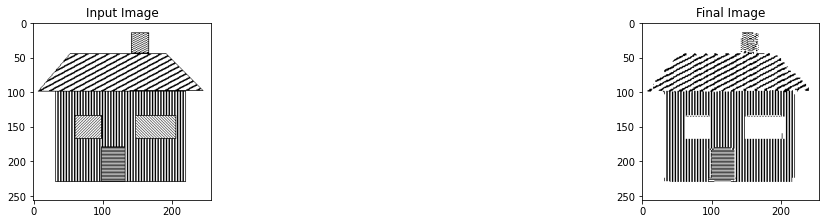

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  squares.png
Memory difference of input and final image arrays (in KB) :  20.02199999999999
Memory difference of input and output images after saving them both in .png (in KB) :  -4.166


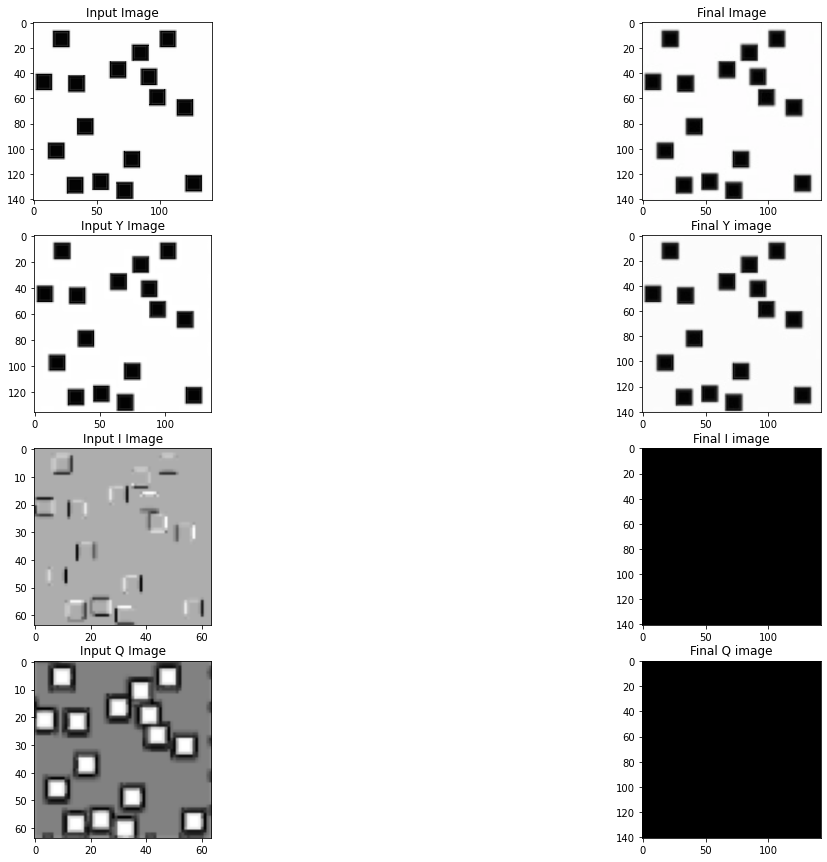

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  textures.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  4.963


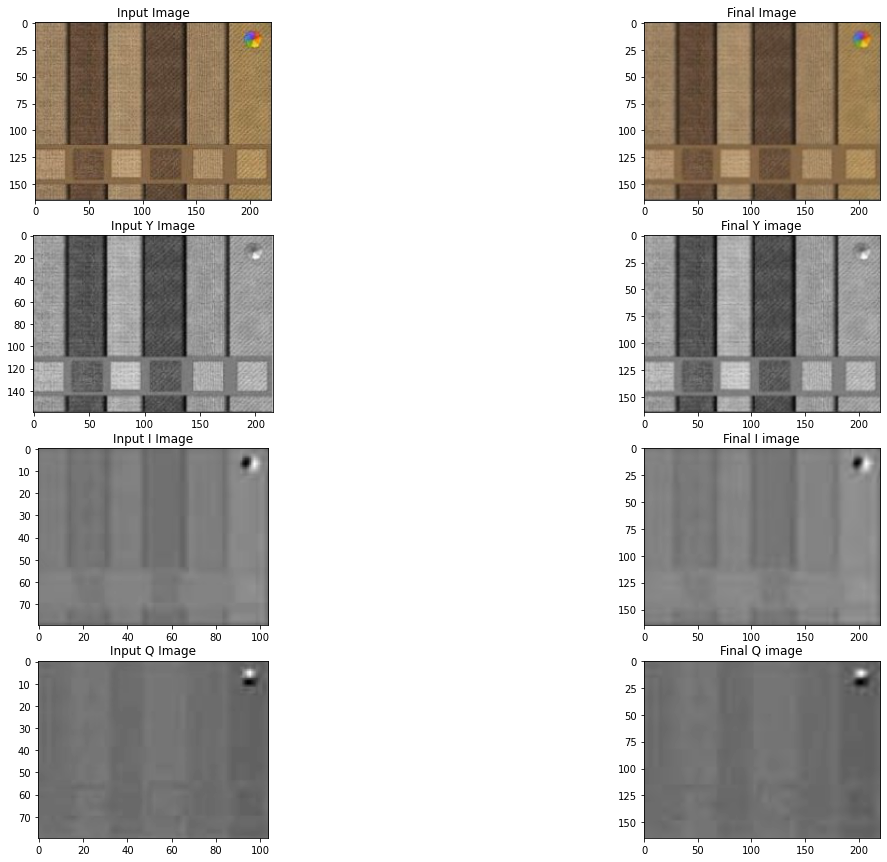

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  tiled.png
Memory difference of input and final image arrays (in KB) :  114.88
Memory difference of input and output images after saving them both in .png (in KB) :  44.397


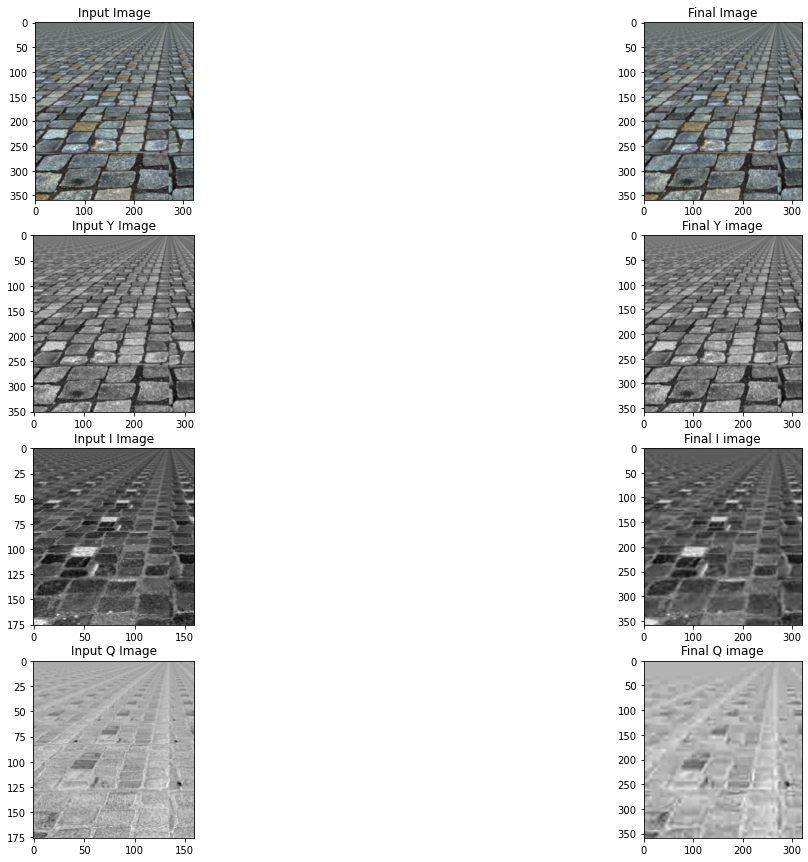

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  zebra-wall.png
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  47.634


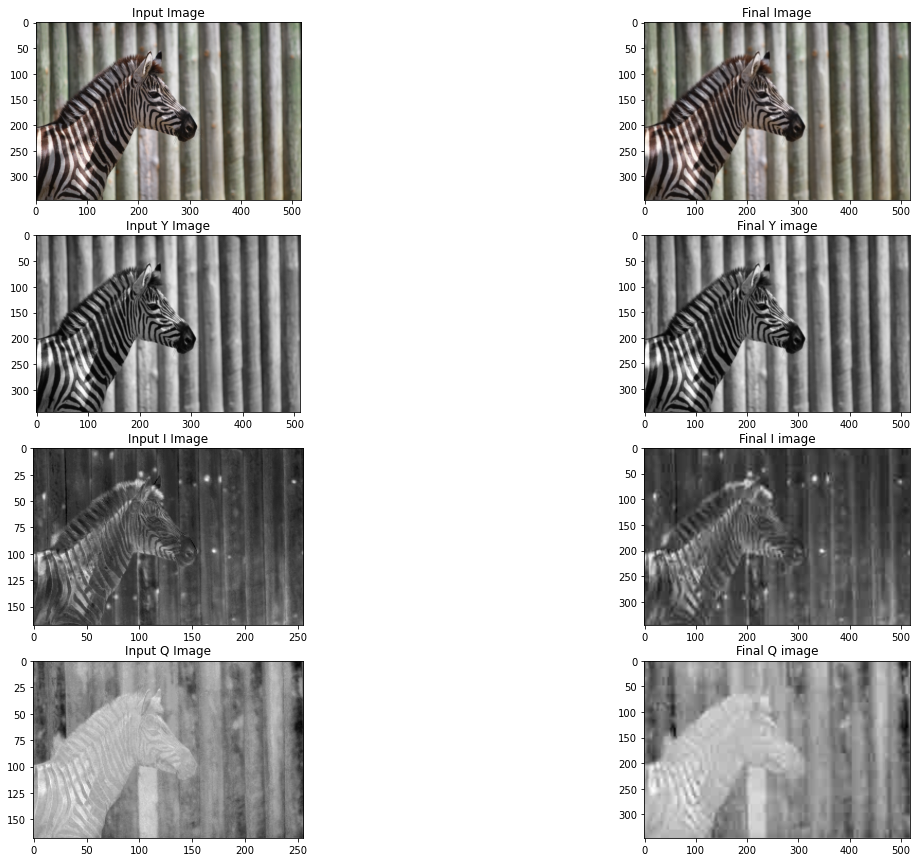

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  astronaut-interference.tif
Memory difference of input and final image arrays (in KB) :  0.0


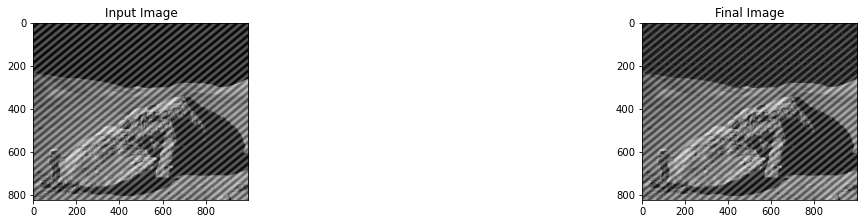

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  checkerboard.png
Memory difference of input and final image arrays (in KB) :  81.51000000000002
Memory difference of input and output images after saving them both in .png (in KB) :  -29.782


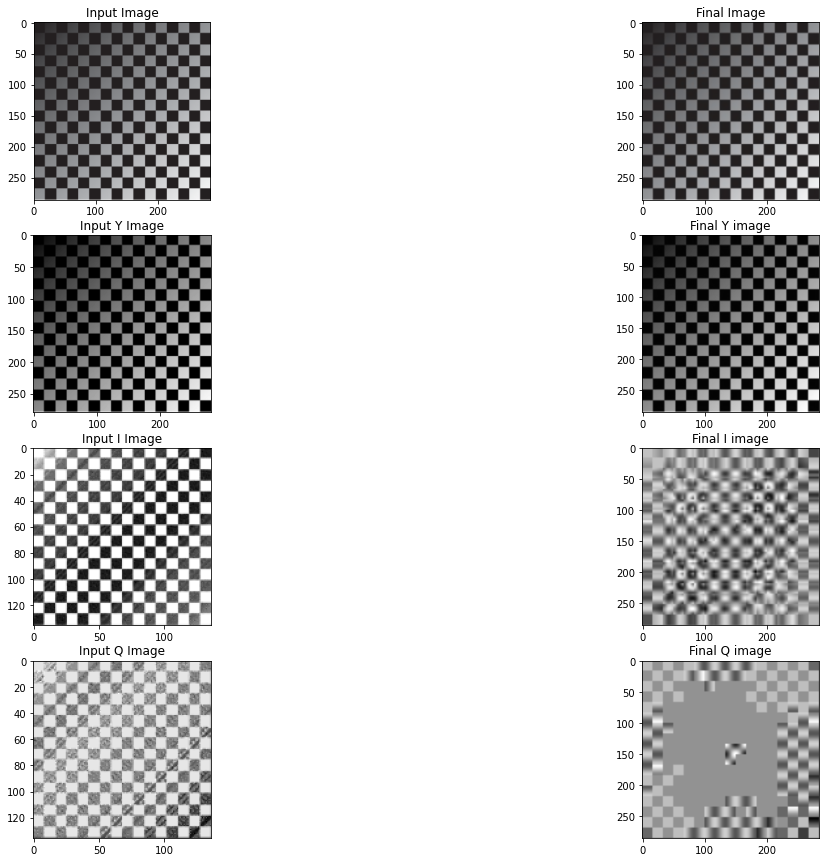

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  face1.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  9.052


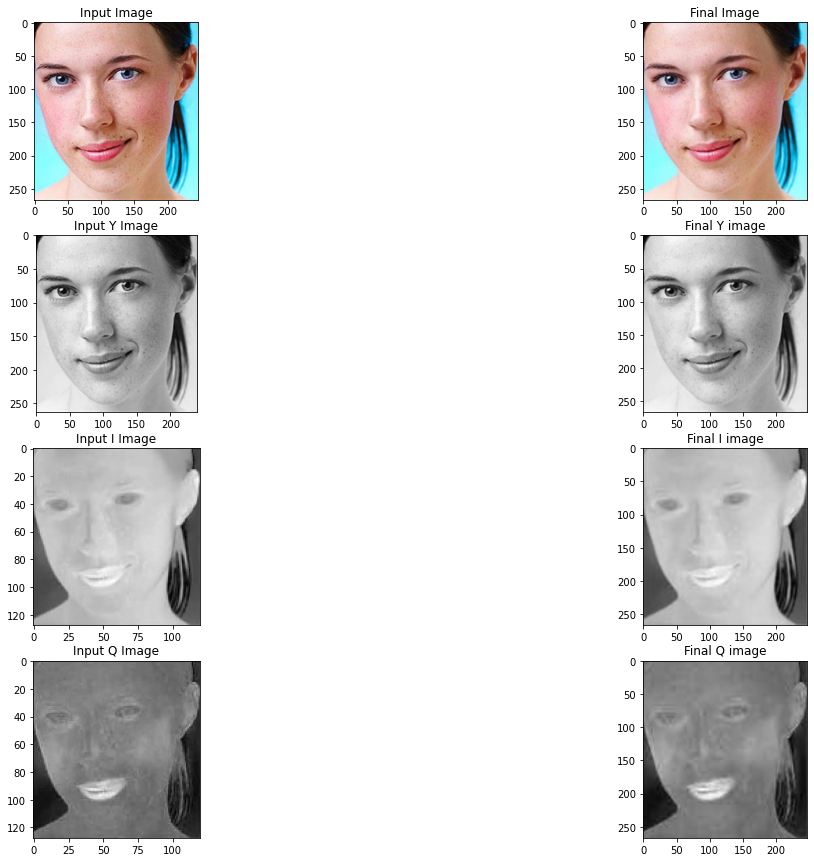

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  face2.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  16.445


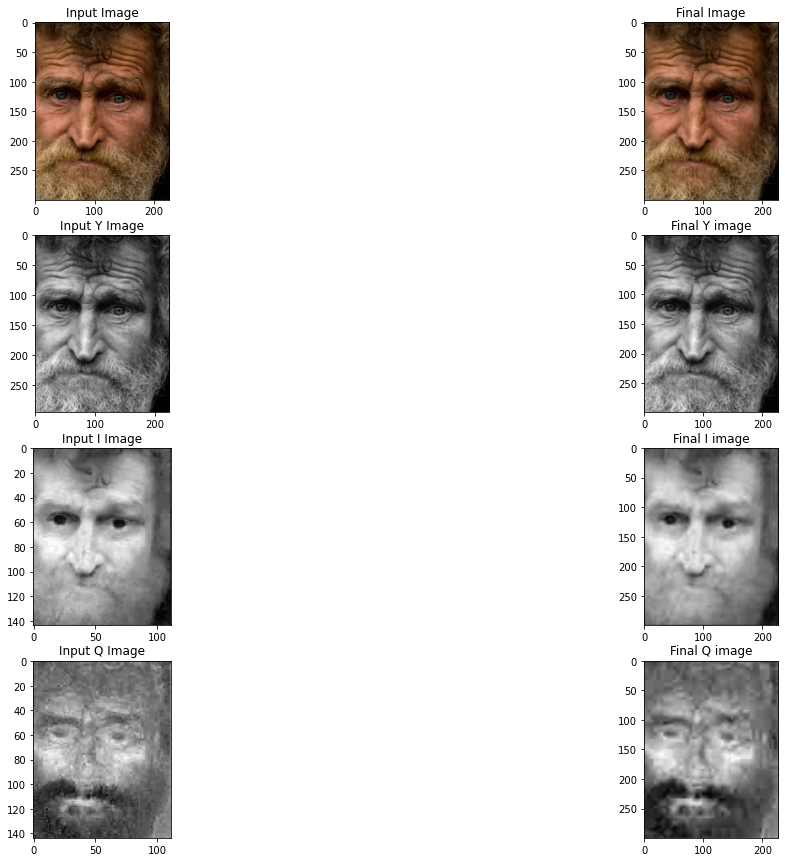

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  frequences.png
Memory difference of input and final image arrays (in KB) :  184.80000000000007
Memory difference of input and output images after saving them both in .png (in KB) :  75.602


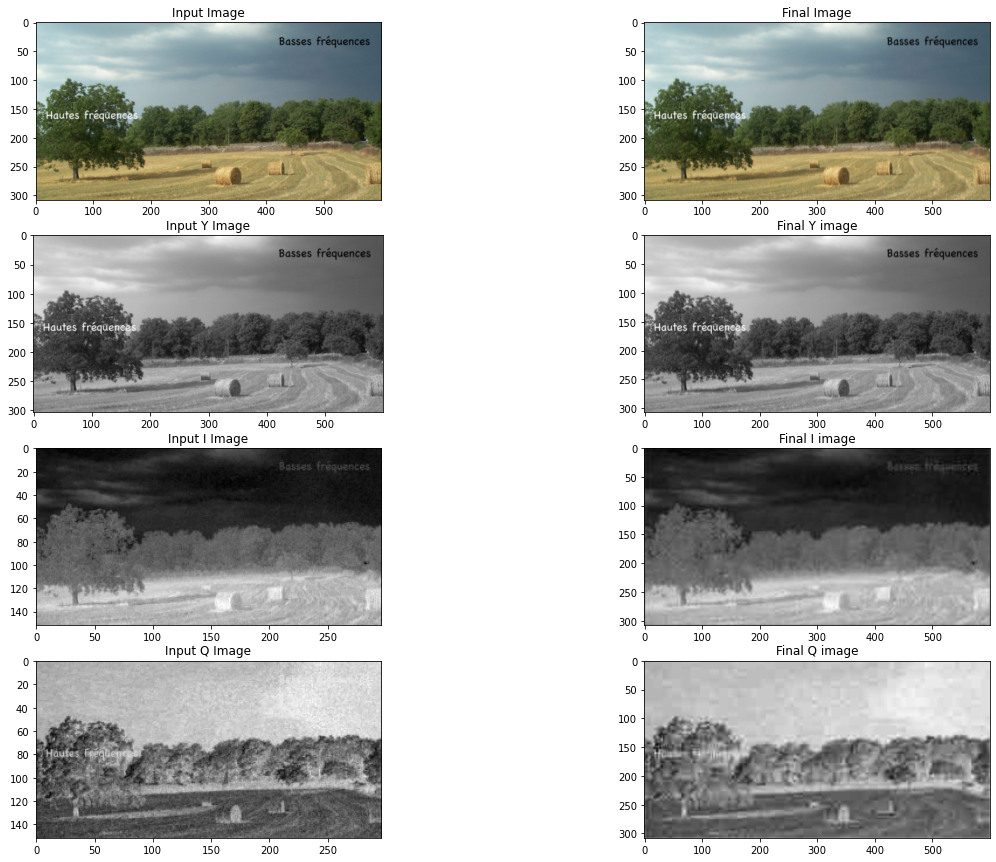

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  letter.png
Memory difference of input and final image arrays (in KB) :  0.0


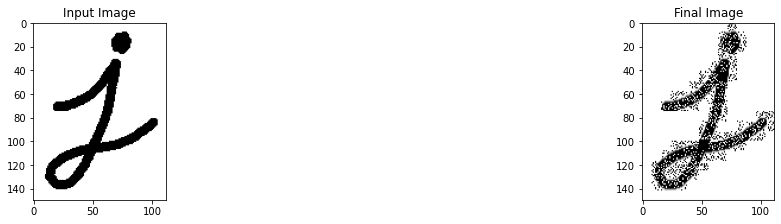

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  seaport.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  67.199


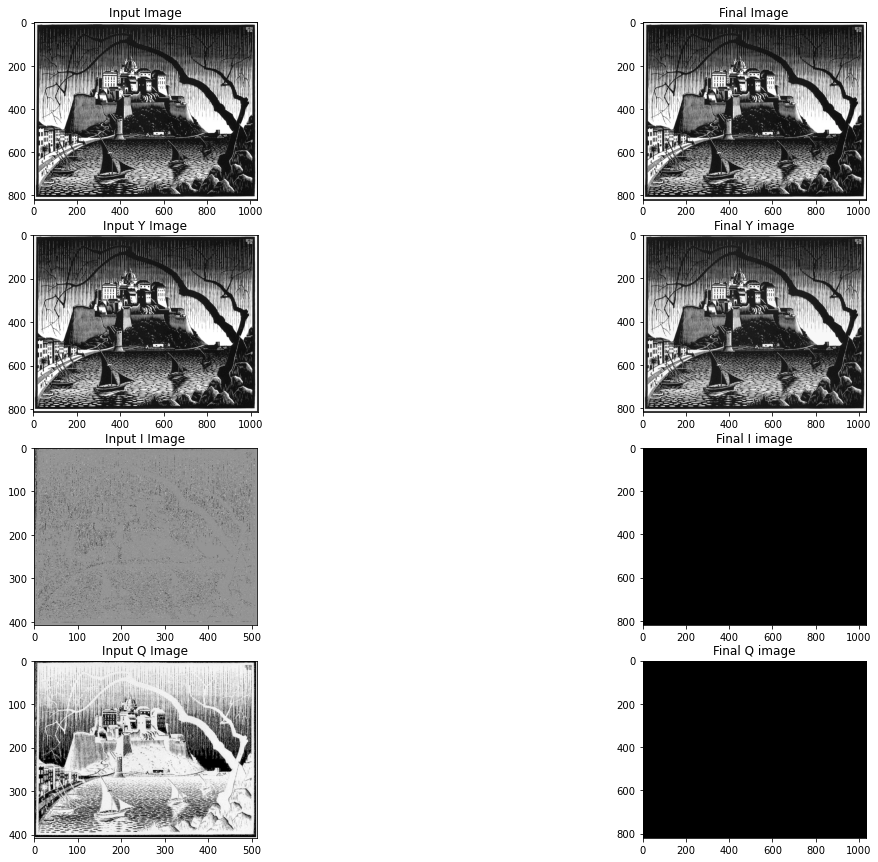

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  snow.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  -238.596


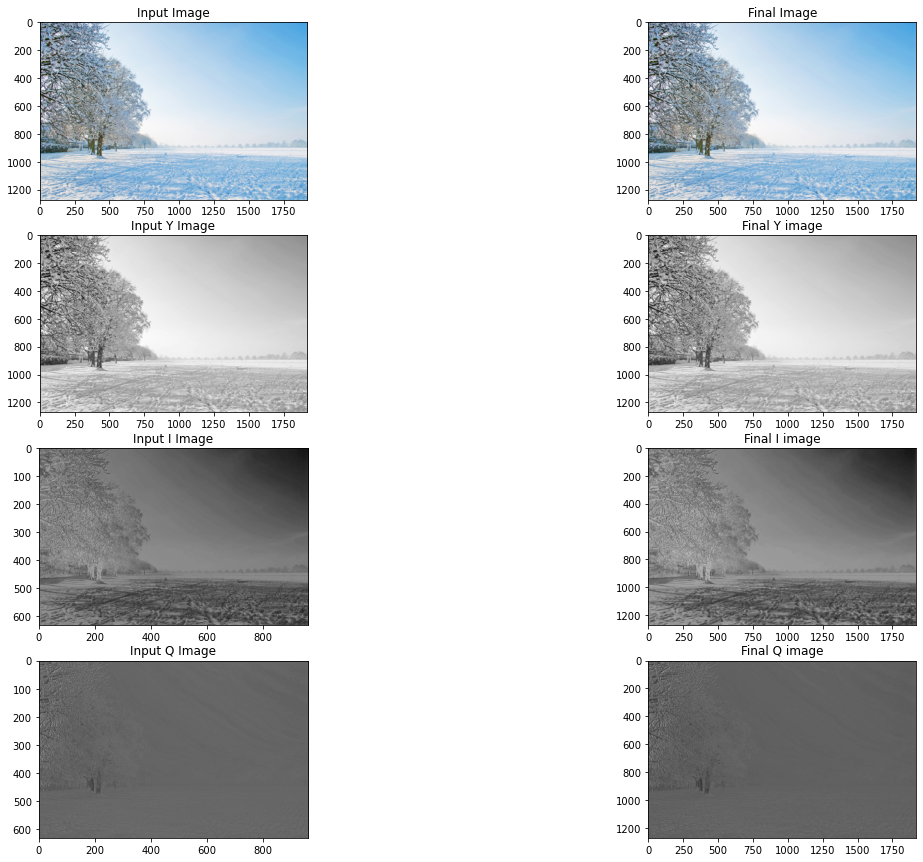

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  sunset.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  1.62


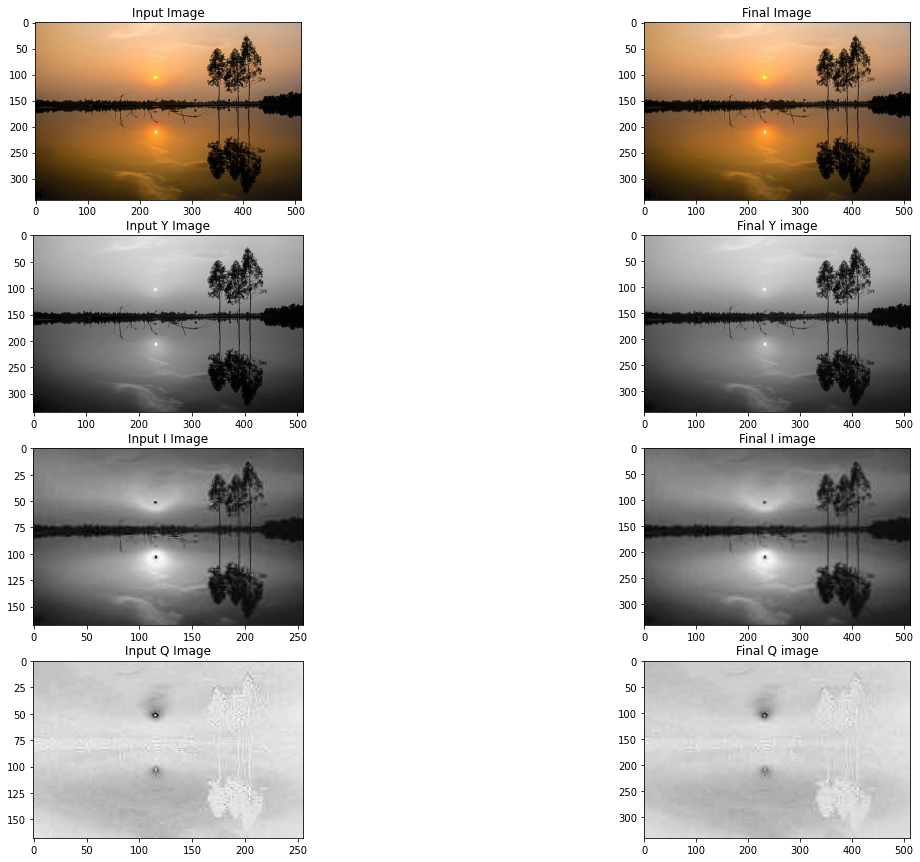

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  text-spotshade.tif
Memory difference of input and final image arrays (in KB) :  0.0


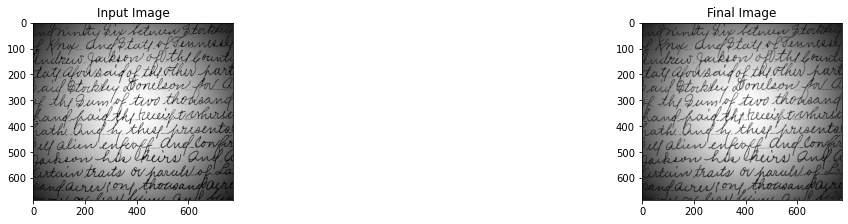

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  tower.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  43.231


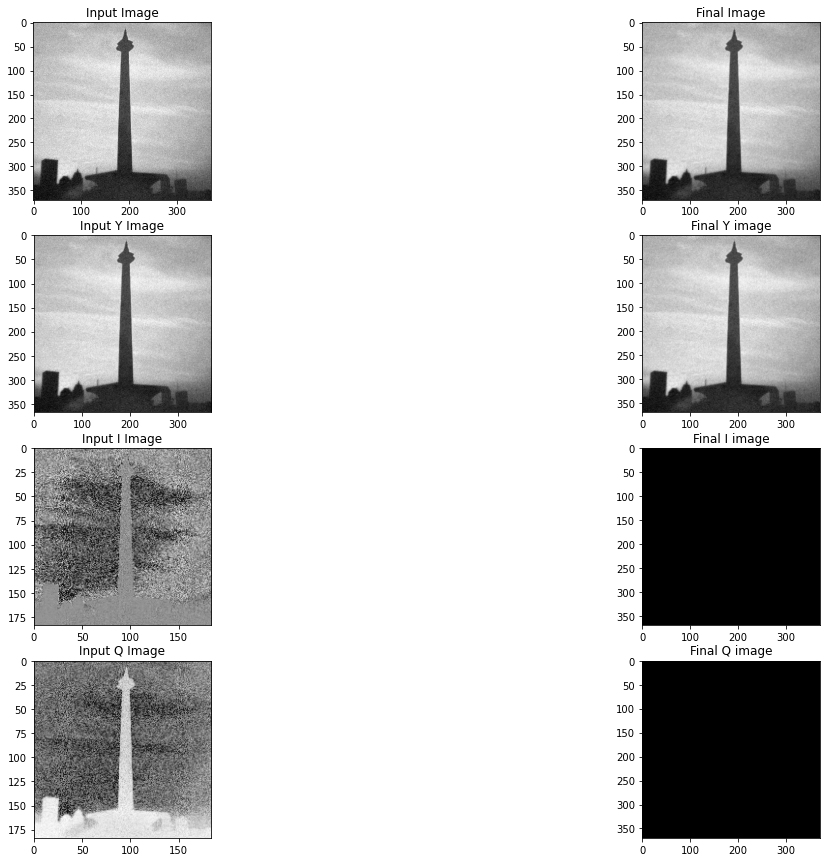

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  pink.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  30.987


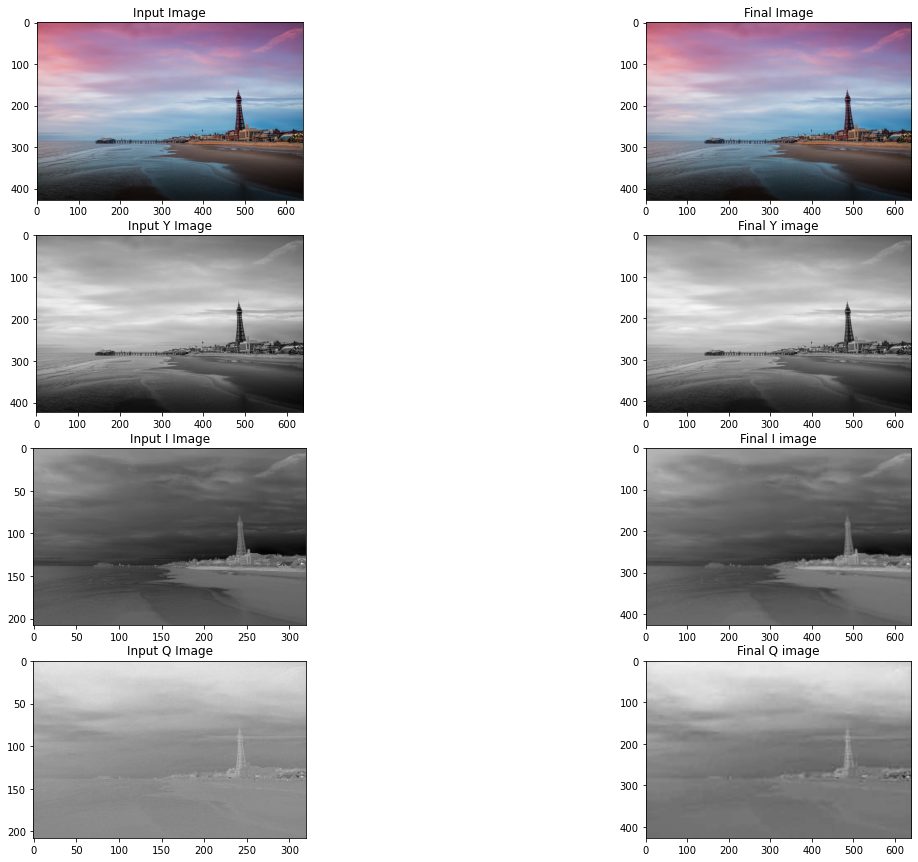

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  spring.JPG
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  -26.376


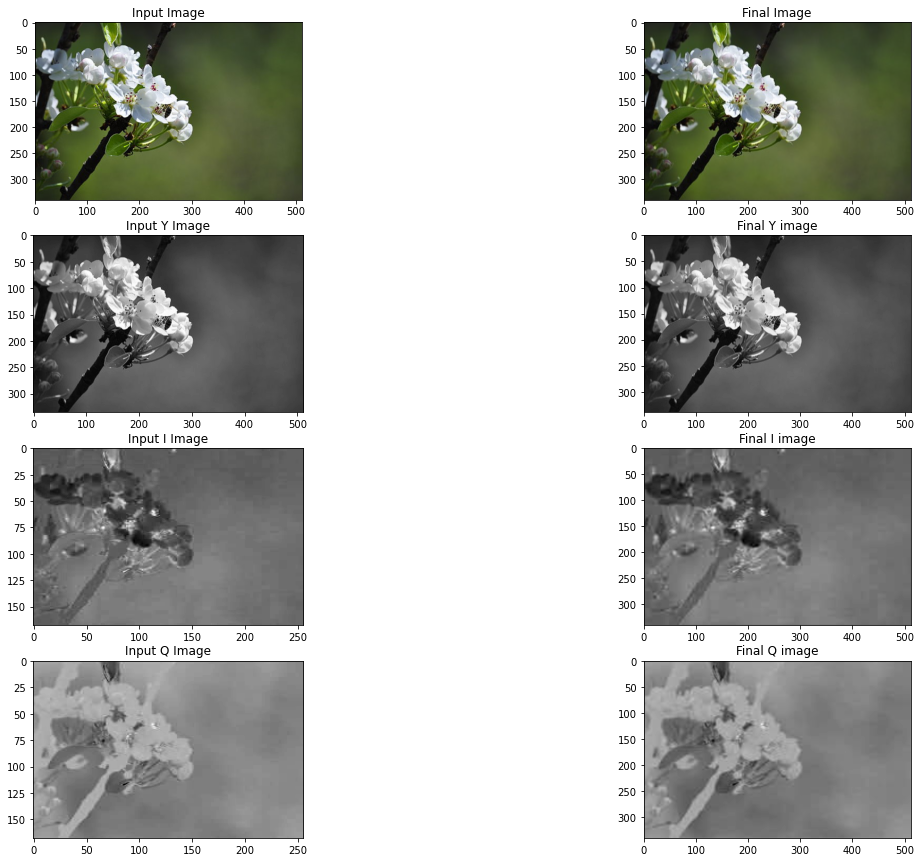

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  cat.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  48.886


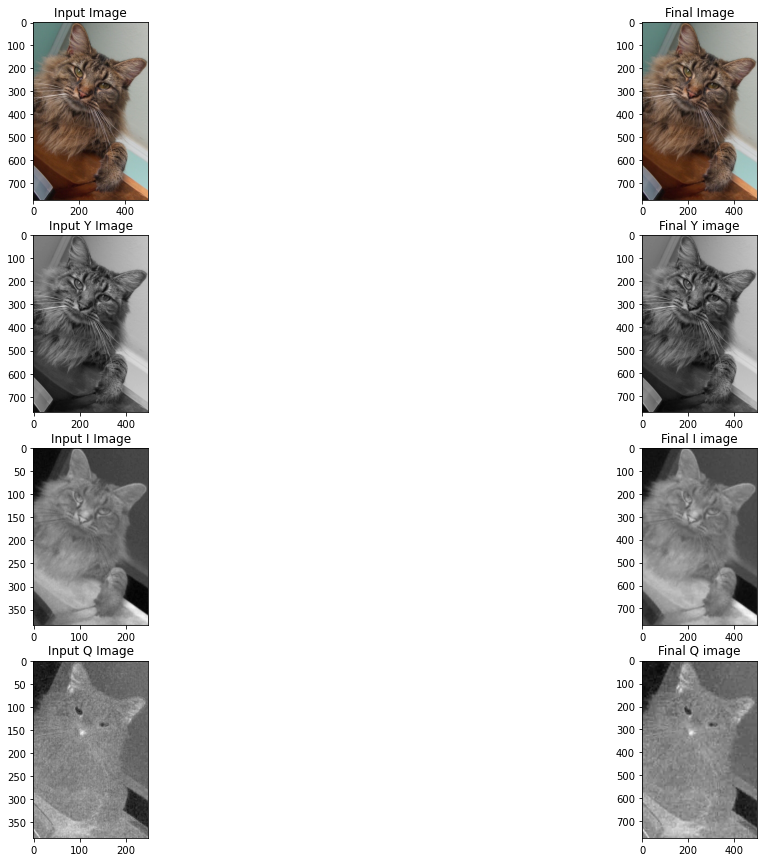

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Image name :  wolf.jpg
Memory difference of input and final image arrays (in KB) :  0.0
Memory difference of input and output images after saving them both in .png (in KB) :  15.182


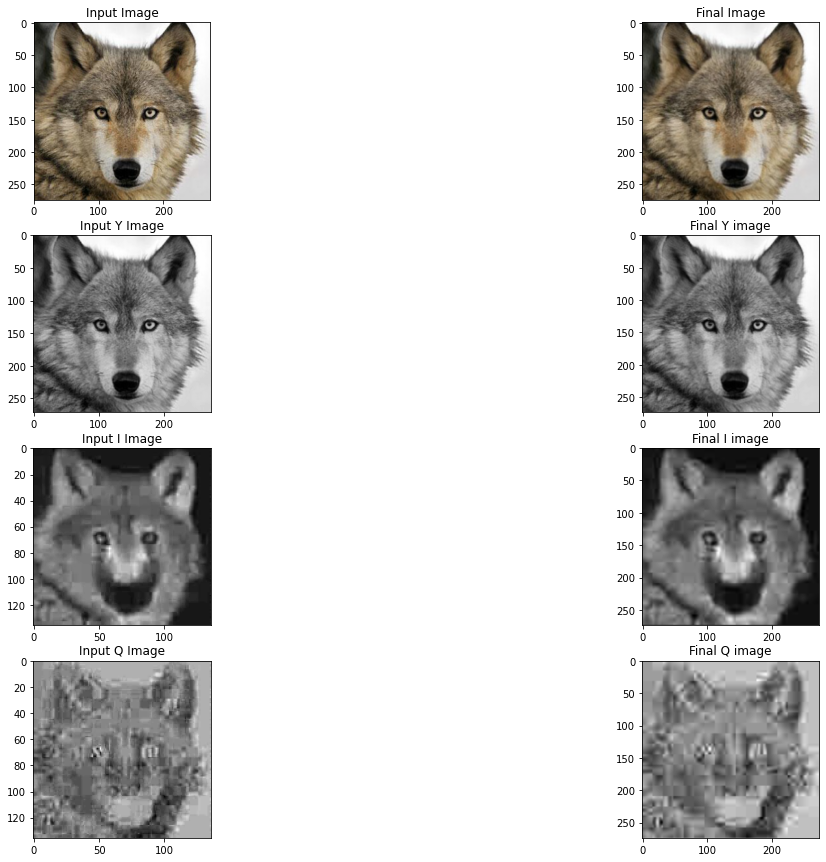

<Figure size 1440x1080 with 0 Axes>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [358]:
width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]

for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        file = os.path.join(root, filename)
        
        #filter only image files with the following format
        if file.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(file)
            filend = file[-5:]
            print("Image name : ", filename)
            
            Y, I, Q = YIQ_con_IQ_downsam(im)  # Converts RGB to YIQ  and downsamples the IQ channels by the resize function

            DicY, DicI, DicQ = DCT_8x8_maker(Y, I, Q)  # Applies DCT & divides the image into 8x8 blocks

            upDicY, upDicI, upDicQ = div_qt(DicY, DicI, DicQ)  # divides the image by the quantisation tables

            reconstruct(upDicY, Y, upDicI, I, upDicQ, Q, filend)  # reconsructs the image by multiplying by quantisation tables,
                                                       # followed by stitching the whole image back and then apply iDCT,
                                                       # followed by resizing the image into the original dimensions of the image 
                                                       # and then prints the input and final images.
            if DicI != 0:
                init_size = os.path.getsize("./mem_in.png")
                fin_size = os.path.getsize("./mem_out.png")
                os.remove("./mem_out.png")
                os.remove("./mem_in.png")
                saved_size = (init_size - fin_size)/1000
                print("Memory difference of input and output images after saving them both in .png (in KB) : ", saved_size)
            
            fig=plt.figure() 
            plt.show()
            print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
            